<a href="https://colab.research.google.com/github/Sapire2003/Project-Portfolio/blob/Data-Analysis/Visualizing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSC-206: Text Analytics
# Noah Sapire


## Assignment 3: Visualizing

In this assignment you'll be practicing with the wordclouds we used in class, to try to gain insights about texts.

There are NO prizes for short, concise code where readability is impacted. However you're free to use concepts and code I use in class.

ALWAYS print nicely.




### Part 1: Selecting words

We're going to use the text of H.G. Wells 'War of the Worlds', as it's a reliable text - in that I know what should happen. If you haven't read the novel, that's ok. You can always watch the 2005 Steven Spielberg movie staring Tom Cruise (or, just take my word for it that it's all about an alien invasion).

Rather than load it from google drive, we'll use the online reading method (the URL for the book in given in the code cell below.

We know something about words - that the most frequently occuring words don't seem all that useful. Looking at them, I also have the feeling that the most common words are fairly short. Let's test this.

(a) Load the War of the Worlds text. Remove the Project Gutenberg legal stuf from the beginning and the end. Strip the text of punctuation and make it lower case. Use a counter object to create a count dictionary of the words. Extract from that dictionary the most_common 100 words. Calculate the average (mean) length of those 100 words. Print it nicely.

In [ ]:
from collections import Counter

import matplotlib.pyplot as plt

import urllib.request

from wordcloud import WordCloud

import string

In [ ]:
# filename for war of the worlds

fileName = "http://gutenberg.org/files/36/36-0.txt"
response = urllib.request.urlopen(fileName)
data = response.read()
text = data.decode('utf-8')

In [ ]:
startStr = "*** START OF THE PROJECT GUTENBERG EBOOK THE WAR OF THE WORLDS"
endStr = "*** END OF THE PROJECT GUTENBERG EBOOK THE WAR OF THE WORLDS"
startIndex = text.find(startStr)
endIndex = text.find(endStr)
story = text[startIndex:endIndex]

In [ ]:
cutText = text[startIndex + len(startStr): endIndex]
for char in string.punctuation:
  cutText = cutText.replace(char,'')
cutText = cutText.lower()

words = cutText.split()
c1 = Counter(words)
top_hundred = c1.most_common(100)
top_hundred_dict = {}
mean = 0
for element in top_hundred:
  top_hundred_dict[element[0]] = element[1]
for value in top_hundred_dict:
  mean += len(value)
mean = mean / 100
print("The mean length of the 100 most common words is: {}".format(mean))

The mean length of the 100 most common words is: 3.72


(b) I think you should have seen that the most frequent words are all fairly short, and we know they aren't very interesting. There's a theory that says that you can tell more about a text by looking specifically at long words.

We're going to visualize ONLY those words that are 7 characters or longer, using the word cloud **generate_from_frequencies** method. This method only accepts dictionaries, or dictionary-like objects (and it turns out that you know that Counters are dictionary-like). So you need to create a counter that has the counts of words that are at least 7 characters long.

Then generate the word cloud. For every word cloud you generate in this assignment, use code like we did in class that makes them square, a decent size, with a minimum font size of 14, and hidden axis.

{'martians': 160, 'towards': 129, 'through': 124, 'brother': 90, 'martian': 77}


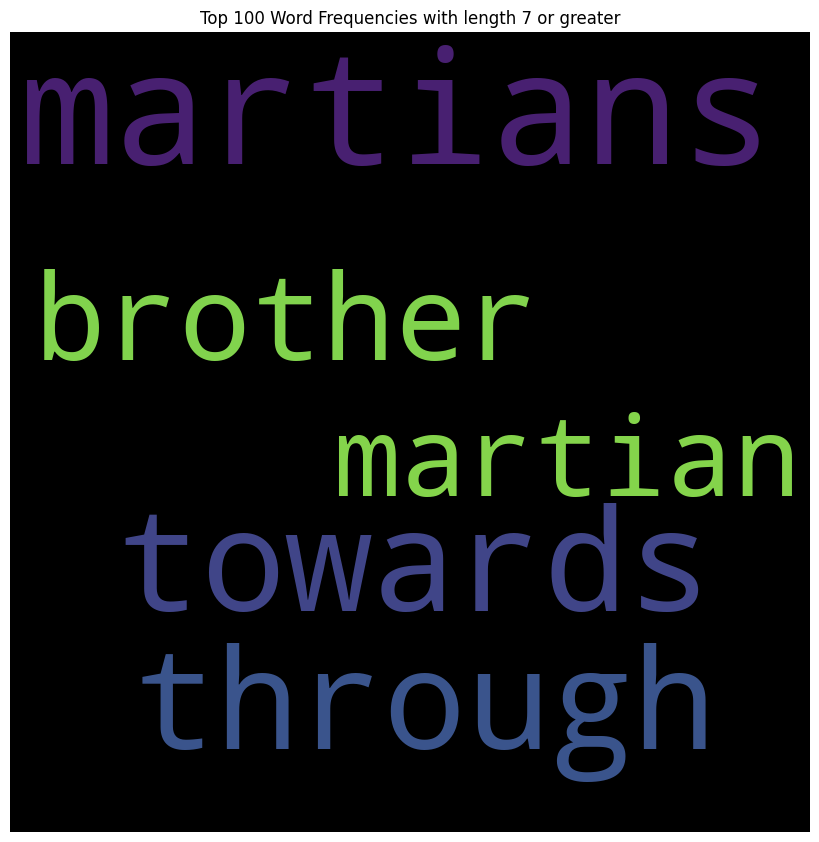

In [ ]:
# Show me the word cloud of long words

length_seven_or_longer = {}
for diction in top_hundred_dict:
  if (len(diction) >= 7):
    length_seven_or_longer[diction] = top_hundred_dict[diction]
print(length_seven_or_longer)
plt.figure(figsize=(8,8))

wordcloud = WordCloud(width=800,height=800, min_font_size=14).generate_from_frequencies(length_seven_or_longer)

plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title("Top 100 Word Frequencies with length 7 or greater")
plt.show()

(c) There's another theory that states we should look at words that only occur once. These even have a fancy name: *hapax legomenon* or just *hapaxes*.

Let's look at those. You'll need to generate a list of words that occur only once in the text. To do that, you can extract words from the Counter object using the .items() method, and select words where the count is exactly one. If you created a list from those words, you could create a new Counter object from that list. This is not the only way to do it, of course. What I want to see is a word cloud of the words that only occur once.

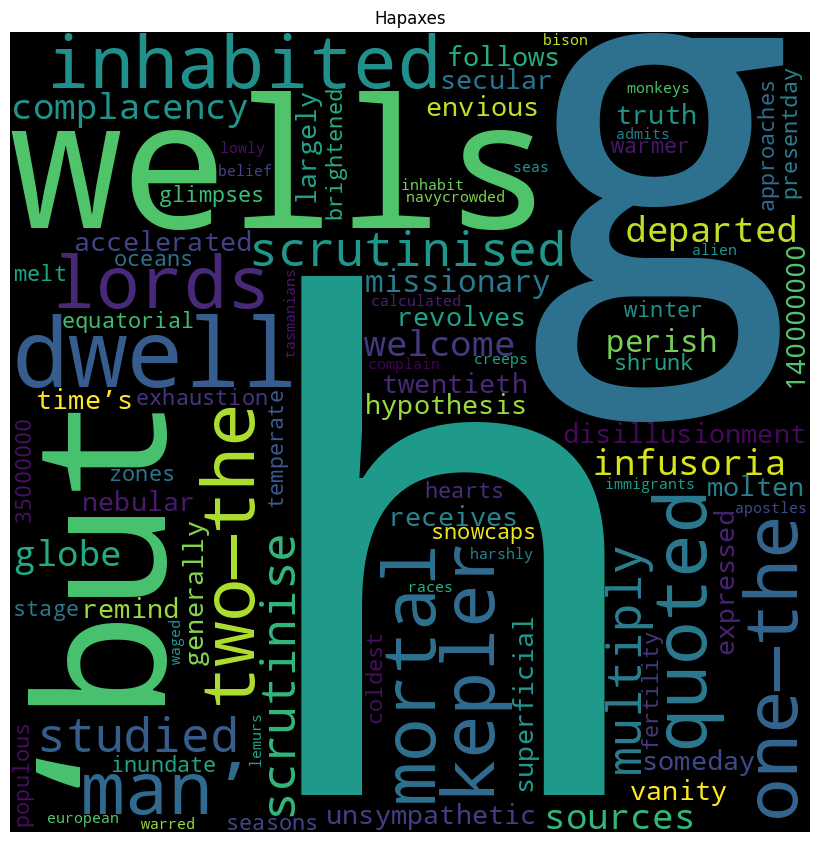

In [ ]:
# Show me the word cloud of hapaxes

unique = []
for in_text, count in c1.items():
  if (count == 1):
    unique.append(in_text)

counter_dict = Counter(unique)

plt.figure(figsize=(8,8))

wordcloud = WordCloud(width=800,height=800, min_font_size=14).generate_from_frequencies(counter_dict)

plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title("Hapaxes")
plt.show()

(d) Again, the cloud above might not be too revealing. Let's combine the ideas of the (b) and (c). Generate me a word cloud of hapaxes that are at least 7 characters long.

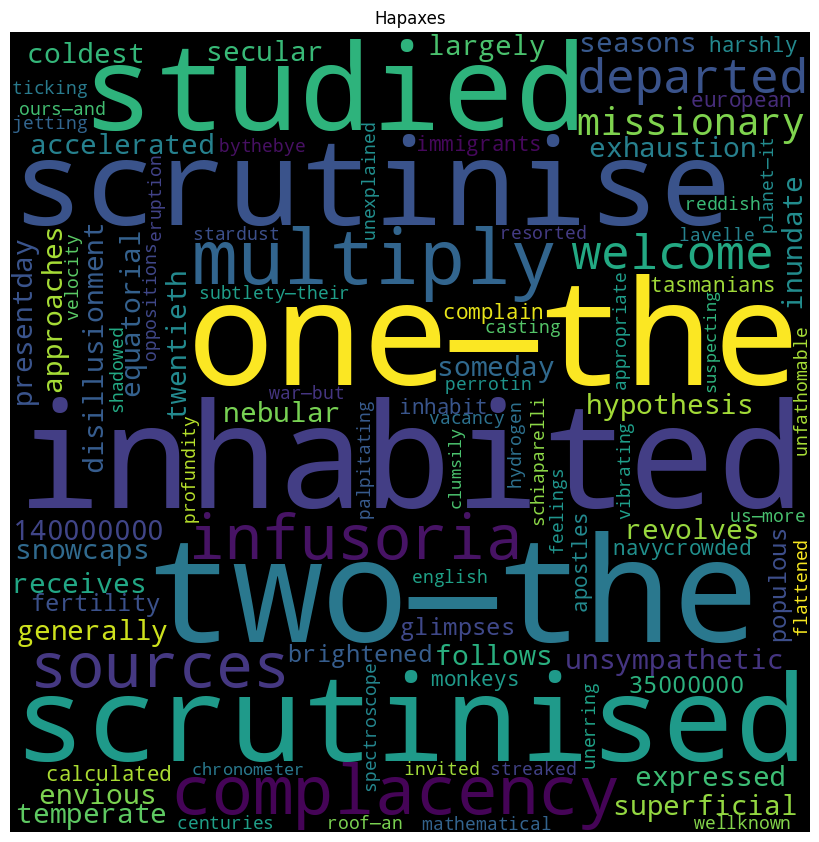

In [ ]:
# Show me the word cloud of long hapaxes

unique_and_long = []
for in_text, count in c1.items():
  if (count == 1 and len(in_text) >= 7):
    unique_and_long.append(in_text)

counter_dict = Counter(unique_and_long)

plt.figure(figsize=(8,8))

wordcloud = WordCloud(width=800,height=800, min_font_size=14).generate_from_frequencies(counter_dict)

plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title("Hapaxes")
plt.show()

(e) Look at the three word clouds above and comment on each. Which do you feel gives you the most information about the novel? Which appeals to you most and why? What problems do you see in any of the word clouds? What about looking at all of them, is that useful?

The one I feel gives the most informatuon is the last one as it has the most uncommon words and also words that can't just be anywhere.  It also appeals to me the most in terms of appearance as they are words I don't always see compared too (c) and not only 7 words like (b).  It really does give the most information too.  

An issue I see is that not all the dashes were removes despite all other punctuation being removed.  Additionally (b) simply has too few words to be an interesting word cloud.  Looking at all of them is definitely useful as it gives you a sense of more possibilities and especially the importance of extra-terrestrials.

**Write up here**

### Part 2: Wiki what now?

In class I showed you the wikipedia module. It allows access to the text of wikipedia articles. There are lots of ways to access wikipedia text, and we have to be careful with this one. I'll talk more about why in class, but we shouldn't use it for scraping all of wikipedia, for example.

It's perfectly fine to grab a few pages however. And that's what we're going to do.

Remember, to use the wikipedia module, we first have to install it. I've shared with you a notebook where you'll see how I do that.

Then we have to import the module. Again, you should see how to do that in the notebook I shared.

(a) I want you to get the text for the page on Quantum mechanics: https://en.wikipedia.org/wiki/Quantum_mechanics

I want you to tell me:
* How many words are in the article
* What's the size of the vocabulary
* What's the mean word length
* What is the lexical density of this text?
* Generate a word cloud from the text (NOT from the frequencies)

In [ ]:
# Give me information about the article on Quantum mechanics here
!pip install wikipedia
import wikipedia

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11679 sha256=742759bc3206d0c19e4fa3f58e4f5c9e1240cd85324546f9edc6a70d04e8cfbd
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


In [ ]:
wikipedia.set_lang("en")

In [ ]:
page = wikipedia.page('Quantum Mechanics')

In [ ]:
def stripPunc(text):
  text = text.lower()
  for char in string.punctuation:
    text = text.replace(char,'')
  return text

text = page.content
clean_text = stripPunc(text)
clean_words = clean_text.split()
unique_clean = word_count = len(inaugural.words(speech))
  date = speech[0:4]
  start = speech.find("-")
  end = speech.find(".")
  speaker = speech[start+1:end]
len_unique_clean = len(unique_clean)

mean = 0
for word in clean_words:
  mean += len(word)
mean_round = round(mean / len(clean_words), 2)
lexical = round(len(unique_clean) / len(clean_words), 2)

Words in the article: 7794
Vocabulary size of the text: 1764
Mean word length of the text: 5.14
Lexical denity of the text: 0.23


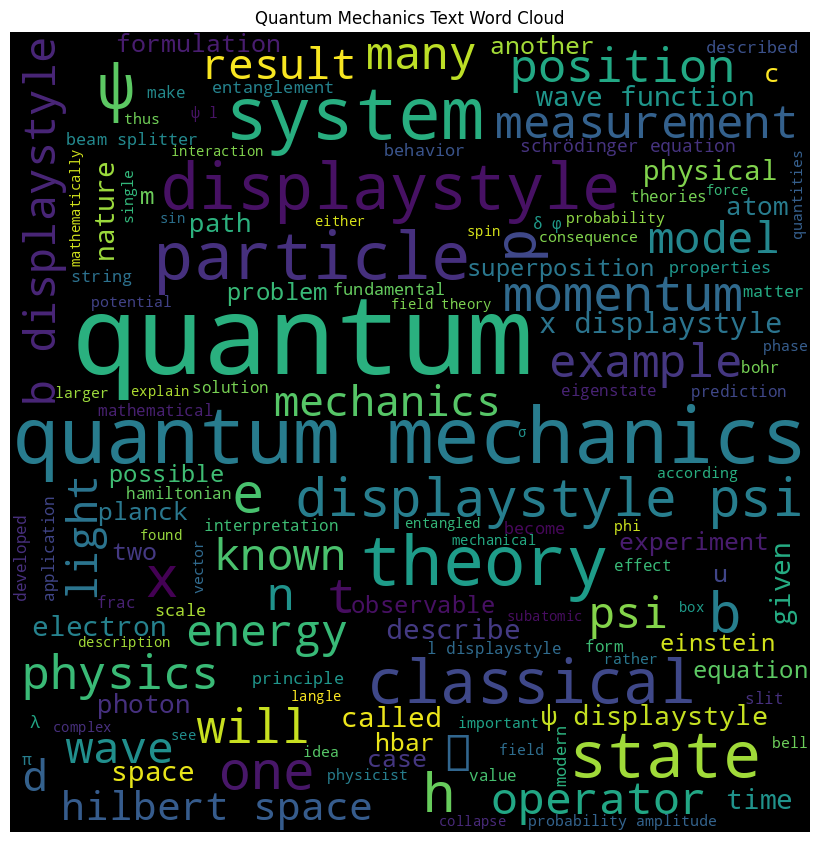

In [ ]:
print("Words in the article: {}".format(len(clean_words)))
print("Vocabulary size of the text: {}".format(len(unique_clean)))
print("Mean word length of the text: {}".format(mean_round))
print("Lexical denity of the text: {}".format(lexical))


plt.figure(figsize=(8,8))

wordcloud = WordCloud(width=800,height=800, min_font_size=14).generate(clean_text)

plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title("Quantum Mechanics Text Word Cloud")
plt.show()

(b) You probably know that wikipedia is available in lots of languages, but did you know that simple english is one of them. It is aimed at those who have simple English, or who are learning English. Many articles in wikipedia have been re-written in simple English.

We can change the language that the wikipedia module uses, by inserting a call to wikipedia.set_lang() as shown below, passing the language as the argument. For example, using the argument 'de' would set the language to German. If you're curious, you can print the output of wikipedia.languages() to see all the available languages.

 Once you've set the language, ANY subsequent call to wikipedia will be in that language, so it may be helpful to set the language in the cell above to english ('en') - so that the cell above runs on full english, and the cell below runs on simple english.

Below, I've set the language to simple English. Now, repeat the work in (a) above using the simple English version. The article has the same name, and you can see it here: https://simple.wikipedia.org/wiki/Quantum_mechanics

I want to see:
* How many words are in the article
* What's the size of the vocabulary
* What's the mean word length
* What is the lexical density of this text?
* Generate a word cloud from the text (NOT from the frequencies)


In [ ]:
# Setting the language

wikipedia.set_lang("simple")

# Now repeat the work from (a)


In [ ]:
def stripPunc(text):
  text = text.lower()
  for char in string.punctuation:
    text = text.replace(char,'')
  return text

text = page.content
clean_text = stripPunc(text)
clean_words = clean_text.split()
unique_clean = set(clean_words)
len_unique_clean = len(unique_clean)

mean = 0
for word in clean_words:
  mean += len(word)
mean_round = round(mean / len(clean_words), 2)
lexical = round(len(unique_clean) / len(clean_words), 2)

Words in the article: 7794
Vocabulary size of the text: 1764
Mean word length of the text: 5.14
Lexical denity of the text: 0.23


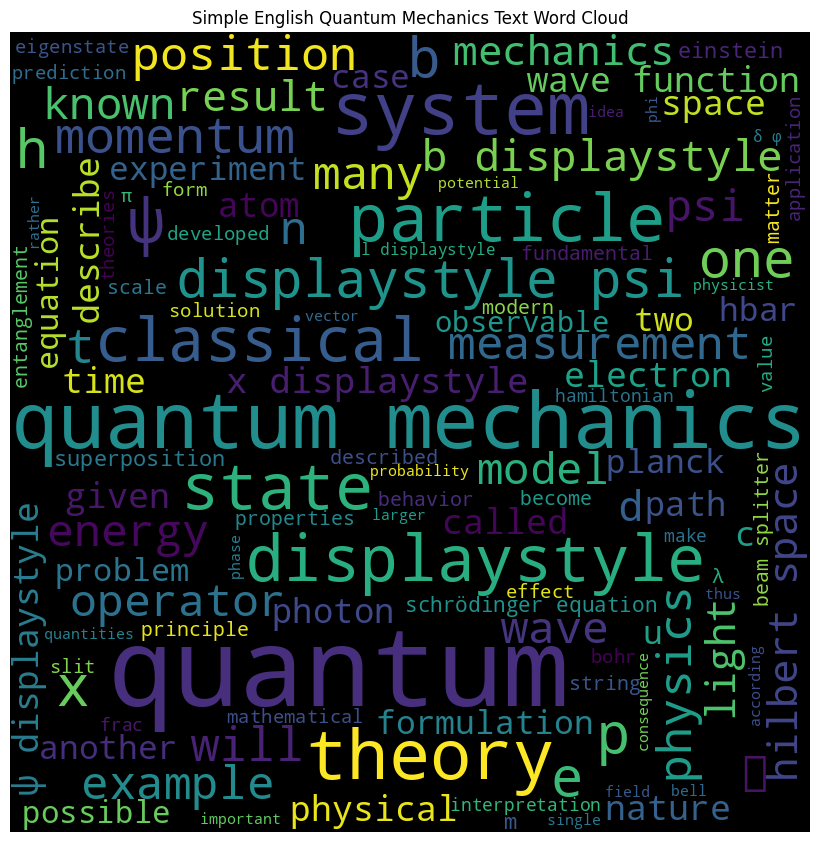

In [ ]:
print("Words in the article: {}".format(len(clean_words)))
print("Vocabulary size of the text: {}".format(len(unique_clean)))
print("Mean word length of the text: {}".format(mean_round))
print("Lexical denity of the text: {}".format(lexical))


plt.figure(figsize=(8,8))

wordcloud = WordCloud(width=800,height=800, min_font_size=14).generate(clean_text)

plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title("Simple English Quantum Mechanics Text Word Cloud")
plt.show()

(c) Offer me a comparison between (a) and (b). These sections are extremely valuble - this is the where the business of analytics happens.

There are very visible differences in each aspect of the article with different languages.
1. It uses about 2300 less words
2. About 600 less unique words
3. A smaller mean word length by .50
4. A smaller lexical density by .02

The second 2 bullets are byproducts of the first which makes sense, but while the difference in words is very different, the mean and lexical density doesn't change very much.
The word clouds are also very different, though the biggest difference I see is in symbols usage.  Simple uses some far less than non-simple


(d) Now YOU choose a topic, and compare the simple and full wikipedia articles, including showing wordclouds and giving me comparative analysis.

In [ ]:
# Your selected articles here
wikipedia.set_lang("en")
page = wikipedia.page("Steam (service)")

In [ ]:
def stripPunc(text):
  text = text.lower()
  for char in string.punctuation:
    text = text.replace(char,'')
  return text

text = page.content
clean_text = stripPunc(text)
clean_words = clean_text.split()
unique_clean = set(clean_words)
len_unique_clean = len(unique_clean)

mean = 0
for word in clean_words:
  mean += len(word)
mean_round = round(mean / len(clean_words), 2)
lexical = round(len(unique_clean) / len(clean_words), 2)

Words in the article: 13628
Vocabulary size of the text: 2607
Mean word length of the text: 5.12
Lexical denity of the text: 0.19


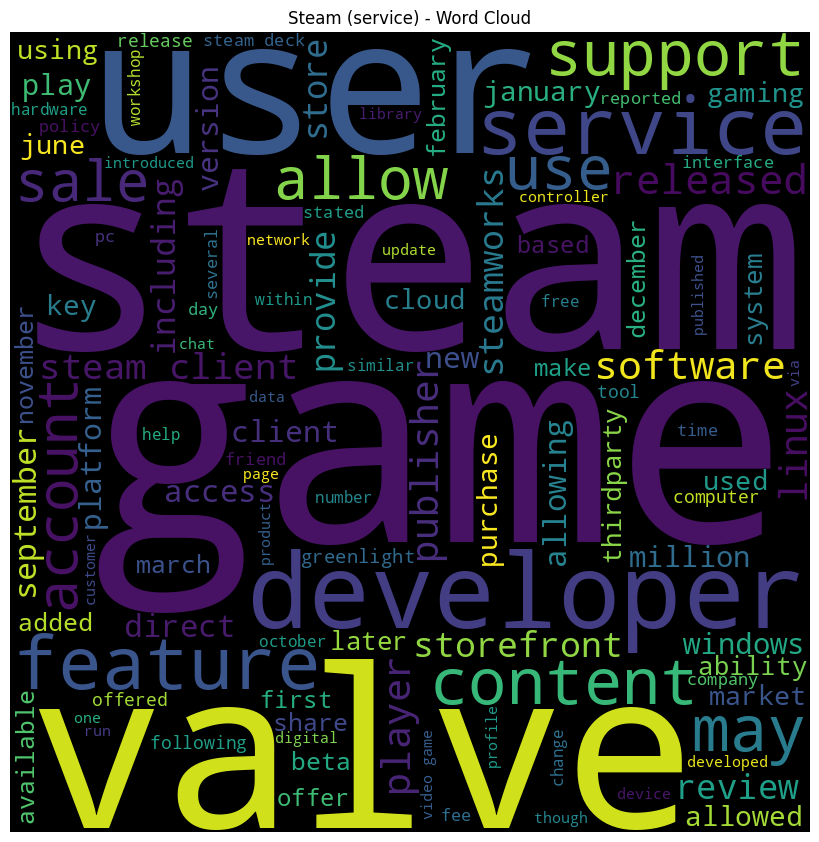

In [ ]:
print("Words in the article: {}".format(len(clean_words)))
print("Vocabulary size of the text: {}".format(len(unique_clean)))
print("Mean word length of the text: {}".format(mean_round))
print("Lexical denity of the text: {}".format(lexical))


plt.figure(figsize=(8,8))

wordcloud = WordCloud(width=800,height=800, min_font_size=14).generate(clean_text)

plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title("Steam (service) - Word Cloud")
plt.show()

In [ ]:
wikipedia.set_lang("simple")
page = wikipedia.page("Steam (service)")

In [ ]:
def stripPunc(text):
  text = text.lower()
  for char in string.punctuation:
    text = text.replace(char,'')
  return text

text = page.content
clean_text = stripPunc(text)
clean_words = clean_text.split()
unique_clean = set(clean_words)
len_unique_clean = len(unique_clean)

mean = 0
for word in clean_words:
  mean += len(word)
mean_round = round(mean / len(clean_words), 2)
lexical = round(len(unique_clean) / len(clean_words), 2)

Words in the article: 227
Vocabulary size of the text: 140
Mean word length of the text: 5.0
Lexical denity of the text: 0.62


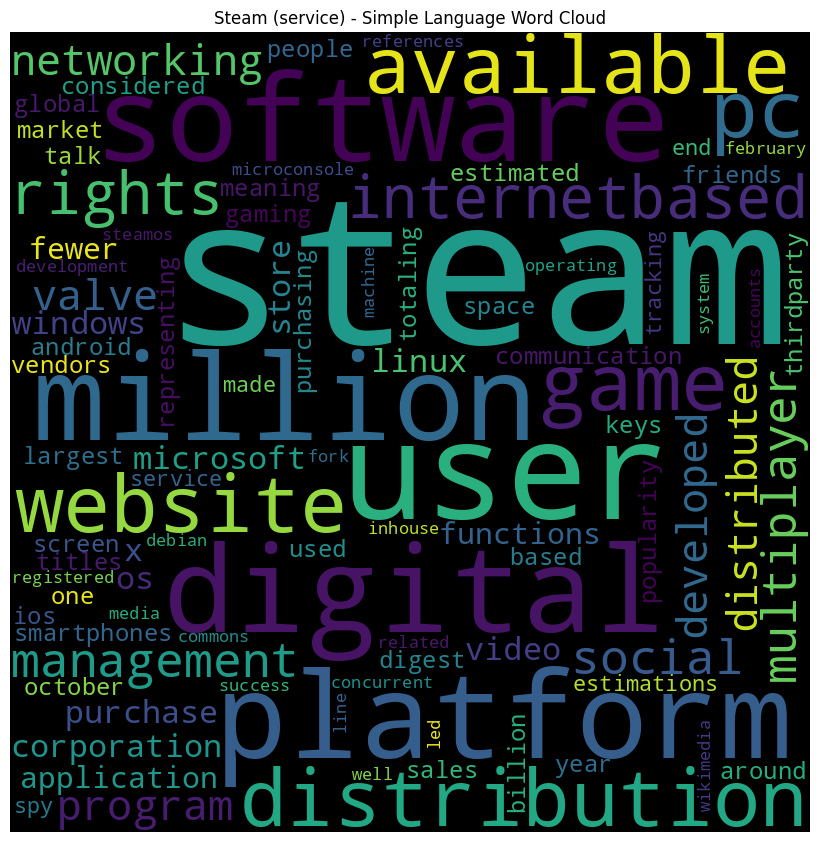

In [ ]:
print("Words in the article: {}".format(len(clean_words)))
print("Vocabulary size of the text: {}".format(len(unique_clean)))
print("Mean word length of the text: {}".format(mean_round))
print("Lexical denity of the text: {}".format(lexical))


plt.figure(figsize=(8,8))

wordcloud = WordCloud(width=800,height=800, min_font_size=14).generate(clean_text)

plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title("Steam (service) - Simple Language Word Cloud")
plt.show()

Words in the article: 13619
Vocabulary size of the text: 2607
Mean word length of the text: 5.12
Lexical denity of the text: 0.19

Words in the article: 227
Vocabulary size of the text: 140
Mean word length of the text: 5.0
Lexical denity of the text: 0.62

The differences in the language are vastly more different compared to those regarding Quantum Mechanics
1. It uses about 13300 less words
2. About 2400 less unique words
3. A smaller mean word length by .12
4. A bigger lexical density by .43

The differences are very vast, though I was surprised by the fact that the word length was near the same amount and that the simple version had such a higher lexical density, though it does make sense with the vastly smaller length of the article.  I am frankly shocked that changing the language to "simple" could have such a large change on the words in the article.

Steam and User being very prevalent in both word clouds makes sense, but it really seems about the same in terms of content regarding words.  I Hypothesize that because the word "Valve" is an actual word along with being the name of the company, it is the reason it isn't as prevalent in the simple word cloud, despite being the company name.